In [2]:
import pandas as pd
import numpy as np
import sys

sys.path.append('../src')

import core as c

In [4]:
seasons = pd.read_csv('../data/processed/E0_seasons_5_to_23.csv')
seasons = c.data_cleaner(seasons)
seasons.head(10)

c:\Users\kocha\Desktop\Football-fun\notebooks\../src\core.py:13: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy.loc[:, "target"] = np.where(df_copy["FTR"] == "H", 0, np.where(df_copy["FTR"] == "A", 2, 1))


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,A_gd_5,H_eff_5,A_eff_5,HST_avg_5,AST_avg_5,target,H_status,A_status,H_H2H,A_H2H
0,E0,13/08/05,Aston Villa,Bolton,2,2,D,2,2,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
1,E0,13/08/05,Everton,Man United,0,2,A,0,1,A,...,NaN,NaN,NaN,0.0,0.0,2,NaN,NaN,NaN,NaN
2,E0,13/08/05,Fulham,Birmingham,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
3,E0,13/08/05,Man City,West Brom,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
4,E0,13/08/05,Middlesbrough,Liverpool,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
5,E0,13/08/05,Portsmouth,Tottenham,0,2,A,0,1,A,...,NaN,NaN,NaN,0.0,0.0,2,NaN,NaN,NaN,NaN
6,E0,13/08/05,Sunderland,Charlton,1,3,A,1,1,D,...,NaN,NaN,NaN,0.0,0.0,2,NaN,NaN,NaN,NaN
7,E0,13/08/05,West Ham,Blackburn,3,1,H,0,1,A,...,NaN,NaN,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN
8,E0,14/08/05,Arsenal,Newcastle,2,0,H,0,0,D,...,NaN,NaN,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN
9,E0,14/08/05,Wigan,Chelsea,0,1,A,0,0,D,...,NaN,NaN,NaN,0.0,0.0,2,NaN,NaN,NaN,NaN


In [5]:
seasons.shape

(6840, 31)

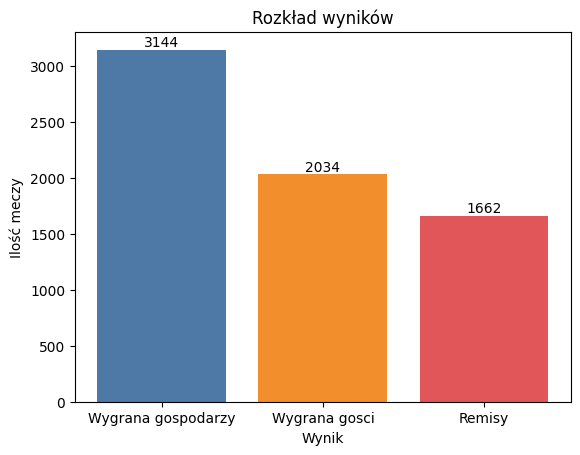

In [6]:
from matplotlib import pyplot as plt

home_wins, away_wins, draws = c.count_results(seasons)

labels = ['Wygrana gospodarzy', 'Wygrana gosci', 'Remisy']
results = [home_wins, away_wins, draws]

for i in range(len(labels)):
    plt.text(i, results[i] + 0.1, str(results[i]), ha='center', va='bottom')

plt.bar(labels, results, color=['#4e79a7', '#f28e2b', '#e15759'])
plt.title('Rozkład wyników')
plt.xlabel('Wynik')
plt.ylabel('Ilość meczy')
plt.show()

In [8]:
HT_results = c.calc_HT_cards(seasons)
AT_results = c.calc_AT_cards(seasons)

print(HT_results)
print(AT_results)

{1: {'wins': 1033, 'losses': 625, 'draws': 537}, 2: {'wins': 764, 'losses': 557, 'draws': 449}, 3: {'wins': 320, 'losses': 303, 'draws': 239}, 4: {'wins': 104, 'losses': 116, 'draws': 89}, 5: {'wins': 33, 'losses': 25, 'draws': 21}, 6: {'wins': 6, 'losses': 11, 'draws': 2}, 7: {'wins': 1, 'losses': 0, 'draws': 1}, 8: {'wins': 0, 'losses': 0, 'draws': 0}}
{1: {'wins': 614, 'losses': 962, 'draws': 457}, 2: {'wins': 545, 'losses': 869, 'draws': 463}, 3: {'wins': 341, 'losses': 523, 'draws': 299}, 4: {'wins': 115, 'losses': 205, 'draws': 145}, 5: {'wins': 38, 'losses': 71, 'draws': 39}, 6: {'wins': 3, 'losses': 12, 'draws': 9}, 7: {'wins': 1, 'losses': 3, 'draws': 5}, 8: {'wins': 1, 'losses': 0, 'draws': 0}}


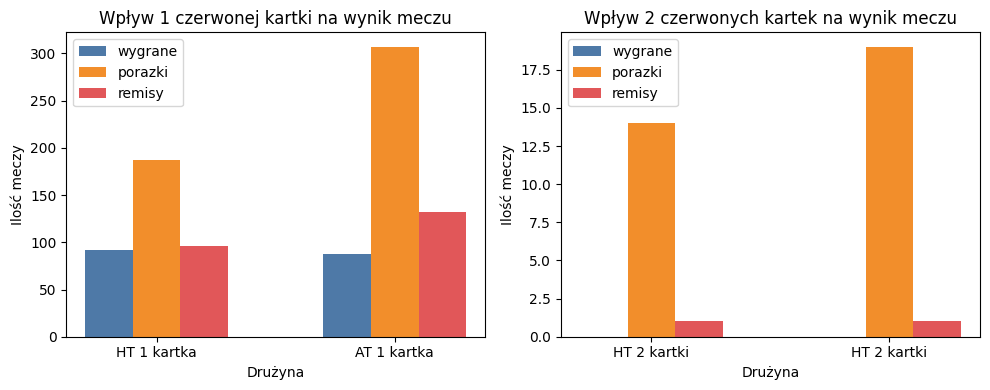

In [9]:
categories_one = ['HT 1 kartka', 'AT 1 kartka']
categories_two = ['HT 2 kartki', 'HT 2 kartki']
wins_1_card = [92, 88]
losses_1_card = [187, 307]
draws_1_card = [96, 132]

wins_2_card = [0, 0]
losses_2_card = [14, 19]
draws_2_card = [1, 1]

# Szerokość słupków
bar_width = 0.2

# Stworzenie tablicy indeksów dla każdego zestawu słupków
index = np.arange(len(categories_one))

# Kolory
colors = ['#4e79a7', '#f28e2b', '#e15759']

# Wygeneruj wykresy słupkowe
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Wykres 1
bar1 = ax1.bar(index - bar_width, wins_1_card, bar_width, label='wygrane', color=colors[0])
bar2 = ax1.bar(index, losses_1_card, bar_width, label='porazki', color=colors[1])
bar3 = ax1.bar(index + bar_width, draws_1_card, bar_width, label='remisy', color=colors[2])
ax1.set_xlabel('Drużyna')
ax1.set_ylabel('Ilość meczy')
ax1.set_title('Wpływ 1 czerwonej kartki na wynik meczu')
ax1.set_xticks(index)
ax1.set_xticklabels(categories_one)
ax1.legend()

# Wykres 2 (identyczny jak wykres 1)
bar1 = ax2.bar(index - bar_width, wins_2_card, bar_width, label='wygrane', color=colors[0])
bar2 = ax2.bar(index, losses_2_card, bar_width, label='porazki', color=colors[1])
bar3 = ax2.bar(index + bar_width, draws_2_card, bar_width, label='remisy', color=colors[2])
ax2.set_xlabel('Drużyna')
ax2.set_ylabel('Ilość meczy')
ax2.set_title('Wpływ 2 czerwonych kartek na wynik meczu')
ax2.set_xticks(index)
ax2.set_xticklabels(categories_two)
ax2.legend()

# Dopasuj odstępy między wykresami
plt.tight_layout()

plt.show()

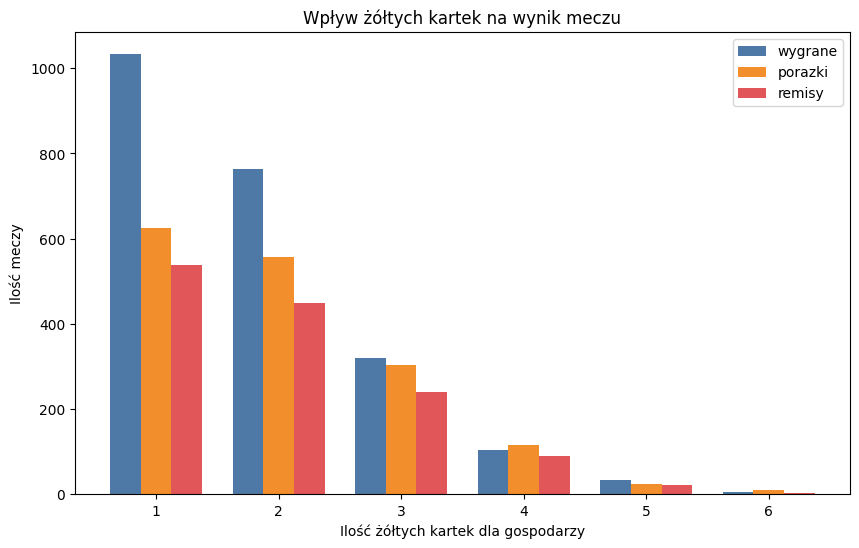

In [ ]:
# Przykładowe dane
data = {
    1: {'wins': 1033, 'losses': 625, 'draws': 537},
    2: {'wins': 764, 'losses': 557, 'draws': 449},
    3: {'wins': 320, 'losses': 303, 'draws': 239},
    4: {'wins': 104, 'losses': 116, 'draws': 89},
    5: {'wins': 33, 'losses': 25, 'draws': 21},
    6: {'wins': 6, 'losses': 11, 'draws': 2},
}

# Konwertuj dane do list
categories = list(data.keys())
wins = [data[cat]['wins'] for cat in categories]
losses = [data[cat]['losses'] for cat in categories]
draws = [data[cat]['draws'] for cat in categories]

# Liczba kategorii
num_categories = len(categories)

# Szerokość słupków
bar_width = 0.25

# Stworzenie tablicy indeksów dla każdej grupy słupków
index = np.arange(num_categories)

# Kolory dla każdej grupy
colors = ['#4e79a7', '#f28e2b', '#e15759']

# Wygeneruj wykres słupkowy
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, wins, bar_width, label='wygrane', color=colors[0])
bar2 = ax.bar(index, losses, bar_width, label='porazki', color=colors[1])
bar3 = ax.bar(index + bar_width, draws, bar_width, label='remisy', color=colors[2])


ax.set_xlabel('Ilość żółtych kartek dla gospodarzy')
ax.set_ylabel('Ilość meczy')
ax.set_title('Wpływ żółtych kartek na wynik meczu')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

In [ ]:
hst = seasons['HST'].corr(seasons['target'])
hst

0.11028432010522796

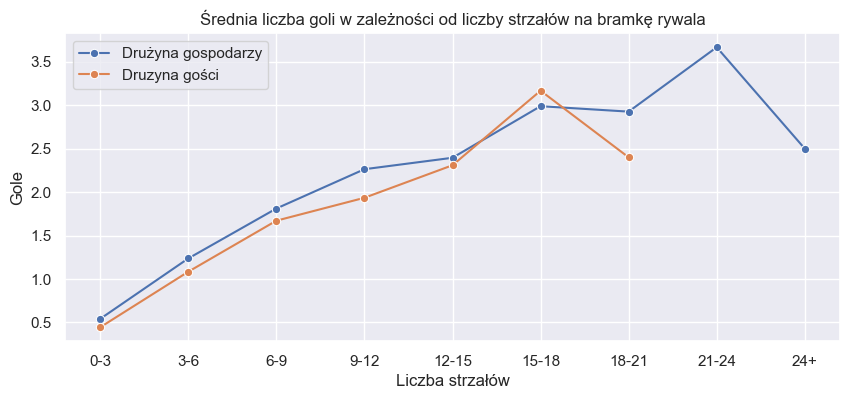

In [14]:
import seaborn as sns

# Tworzenie przedziałów liczby strzałów
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, np.inf]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', '24+']

# Dodawanie nowej kolumny z przedziałami liczby strzałów
seasons['HST_Group'] = pd.cut(seasons['HST'], bins=bins, labels=labels, right=False)
seasons['AST_Group'] = pd.cut(seasons['AST'], bins=bins, labels=labels, right=False)

# Obliczanie średniej liczby bramek dla każdego przedziału
average_goals_HT = seasons.groupby('HST_Group')['FTHG'].mean()
average_goals_AT = seasons.groupby('AST_Group')['FTAG'].mean()

# Tworzenie ramki danych do wykresu
df_plot = pd.DataFrame({
    'HST_Group': average_goals_HT.index,
    'Average Goals (Home Team)': average_goals_HT.values,
    'AST_Group': average_goals_AT.index,
    'Average Goals (Away Team)': average_goals_AT.values,
})

# Ustawienia wykresu
sns.set(style="darkgrid")
plt.figure(figsize=(10, 4))

# Wykres punktowy połączony
sns.lineplot(data=df_plot, x='HST_Group', y='Average Goals (Home Team)', marker='o', label='Drużyna gospodarzy')
sns.lineplot(data=df_plot, x='AST_Group', y='Average Goals (Away Team)', marker='o', label='Druzyna gości')

# Ustawienia osi i tytułu
plt.title('Średnia liczba goli w zależności od liczby strzałów na bramkę rywala')
plt.xlabel('Liczba strzałów')
plt.ylabel('Gole')
plt.legend(loc='upper left')

# Wyświetlanie wykresu
plt.show()

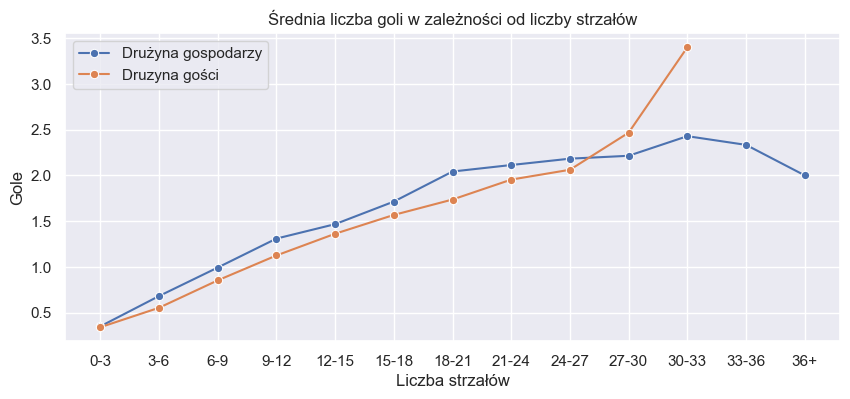

In [13]:
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, np.inf]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', '24-27', '27-30', '30-33', '33-36', '36+']

# Dodawanie nowej kolumny z przedziałami liczby strzałów
seasons['HS_Group'] = pd.cut(seasons['HS'], bins=bins, labels=labels, right=False)
seasons['AS_Group'] = pd.cut(seasons['AS'], bins=bins, labels=labels, right=False)

# Obliczanie średniej liczby bramek dla każdego przedziału
average_goals_HT = seasons.groupby('HS_Group')['FTHG'].mean()
average_goals_AT = seasons.groupby('AS_Group')['FTAG'].mean()

# Tworzenie ramki danych do wykresu
df_plot = pd.DataFrame({
    'HS_Group': average_goals_HT.index,
    'Average Goals (Home Team)': average_goals_HT.values,
    'AS_Group': average_goals_AT.index,
    'Average Goals (Away Team)': average_goals_AT.values,
})

# Ustawienia wykresu
sns.set(style="darkgrid")
plt.figure(figsize=(10, 4))

# Wykres punktowy połączony
sns.lineplot(data=df_plot, x='HS_Group', y='Average Goals (Home Team)', marker='o', label='Drużyna gospodarzy')
sns.lineplot(data=df_plot, x='AS_Group', y='Average Goals (Away Team)', marker='o', label='Druzyna gości')

# Ustawienia osi i tytułu
plt.title('Średnia liczba goli w zależności od liczby strzałów')
plt.xlabel('Liczba strzałów')
plt.ylabel('Gole')
plt.legend(loc='upper left')

# Wyświetlanie wykresu
plt.show()

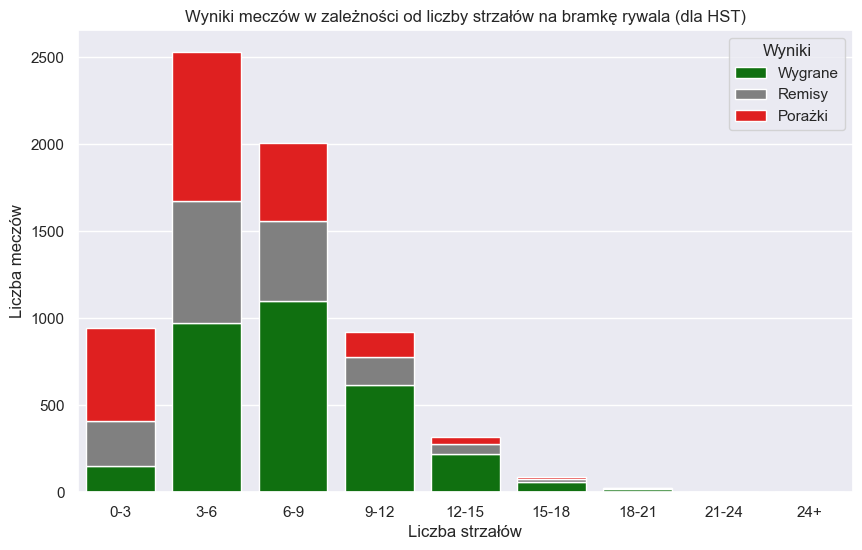

In [ ]:
# Obliczanie liczby zwycięstw, porażek i remisów dla każdego przedziału
draw_counts = seasons[seasons['target'] == 2].groupby('HST_Group')['target'].count()
win_counts = seasons[seasons['target'] == 1].groupby('HST_Group')['target'].count()
loss_counts = seasons[seasons['target'] == 0].groupby('HST_Group')['target'].count()

# Tworzenie ramki danych do wykresu
df_results = pd.DataFrame({
    'HST_Group': win_counts.index,
    'Wins': win_counts.values,
    'Draws': draw_counts.values,
    'Losses': loss_counts.values,
})

# Ustawienia wykresu
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Wykres słupkowy skumulowany
sns.barplot(data=df_results, x='HST_Group', y='Wins', color='green', label='Wygrane')
sns.barplot(data=df_results, x='HST_Group', y='Draws', bottom=df_results['Wins'], color='gray', label='Remisy')
sns.barplot(data=df_results, x='HST_Group', y='Losses', bottom=df_results['Wins'] + df_results['Draws'], color='red', label='Porażki')

# Ustawienia osi i tytułu
plt.title('Wyniki meczów w zależności od liczby strzałów na bramkę rywala (dla HST)')
plt.xlabel('Liczba strzałów')
plt.ylabel('Liczba meczów')
plt.legend(title='Wyniki', loc='upper right')

# Wyświetlanie wykresu
plt.show()


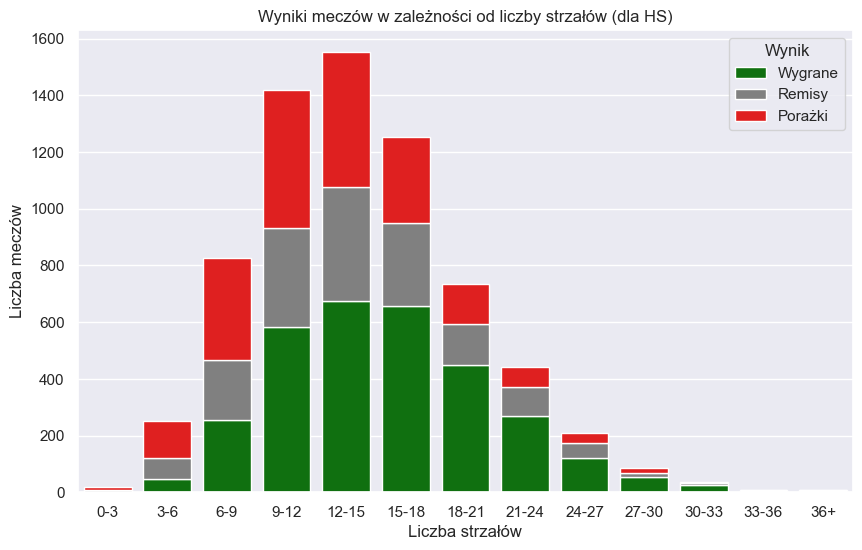

In [ ]:
# Obliczanie liczby zwycięstw, porażek i remisów dla każdego przedziału
draw_counts = seasons[seasons['target'] == 2].groupby('HS_Group')['target'].count()
win_counts = seasons[seasons['target'] == 1].groupby('HS_Group')['target'].count()
loss_counts = seasons[seasons['target'] == 0].groupby('HS_Group')['target'].count()

# Tworzenie ramki danych do wykresu
df_results = pd.DataFrame({
    'HS_Group': win_counts.index,
    'Wins': win_counts.values,
    'Draws': draw_counts.values,
    'Losses': loss_counts.values,
})

# Ustawienia wykresu
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Wykres słupkowy skumulowany
sns.barplot(data=df_results, x='HS_Group', y='Wins', color='green', label='Wygrane')
sns.barplot(data=df_results, x='HS_Group', y='Draws', bottom=df_results['Wins'], color='gray', label='Remisy')
sns.barplot(data=df_results, x='HS_Group', y='Losses', bottom=df_results['Wins'] + df_results['Draws'], color='red', label='Porażki')

# Ustawienia osi i tytułu
plt.title('Wyniki meczów w zależności od liczby strzałów (dla HS)')
plt.xlabel('Liczba strzałów')
plt.ylabel('Liczba meczów')
plt.legend(title='Wynik', loc='upper right')

# Wyświetlanie wykresu
plt.show()